In [25]:
import pandas as pd

# Use your existing neighborhood_summary
final_summary = neighborhood_summary.copy()

# Citywide totals
total_vacant = final_summary["vacant_properties"].sum()

# Share of citywide vacant properties
final_summary["vacancy_share_citywide"] = (
    final_summary["vacant_properties"] / total_vacant
)

# Rank neighborhoods by vacancy burden
final_summary["vacancy_rank"] = (
    final_summary["vacant_properties"]
    .rank(ascending=False, method="dense")
)

final_summary = final_summary.sort_values("vacant_properties", ascending=False)

display(final_summary.head(15))


,neighborhood,vacant_properties,residential,commercial,on_snow_route,pct_on_snow_route,vacancy_share_citywide,vacancy_rank
0,Brighton,248,240,8,0,0.0,0.150212,1.0
15,Northside,179,162,17,0,0.0,0.108419,2.0
13,Near Westside,121,107,14,0,0.0,0.073289,3.0
24,Southside,103,95,8,0,0.0,0.062386,4.0
25,Southwest,94,89,5,0,0.0,0.056935,5.0
4,Elmwood,87,75,12,0,0.0,0.052695,6.0
3,Eastwood,86,77,9,0,0.0,0.052090,7.0
17,Park Ave,68,56,12,0,0.0,0.041187,8.0
30,Washington Square,66,58,8,0,0.0,0.039976,9.0
10,Lincoln Hill,65,59,6,0,0.0,0.039370,10.0


# Phase 3

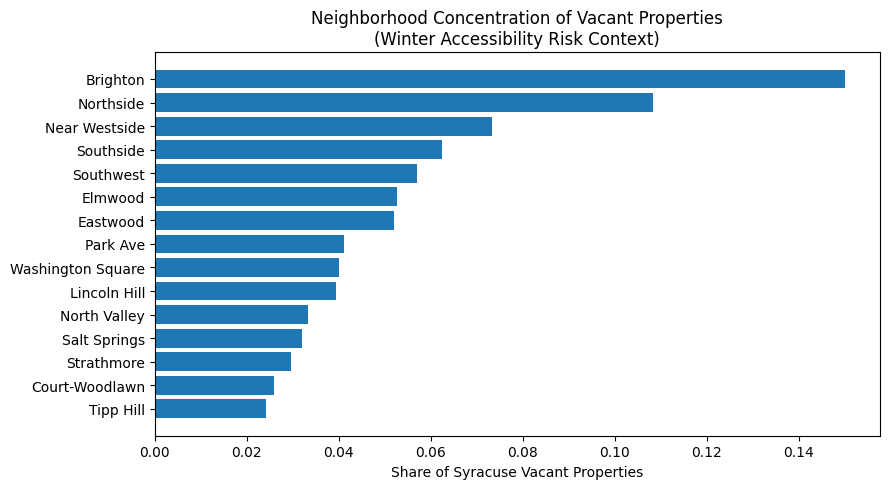

In [26]:
import matplotlib.pyplot as plt

top = final_summary.head(15)

plt.figure(figsize=(9,5))
plt.barh(top["neighborhood"], top["vacancy_share_citywide"])
plt.xlabel("Share of Syracuse Vacant Properties")
plt.title("Neighborhood Concentration of Vacant Properties\n(Winter Accessibility Risk Context)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [28]:
import matplotlib.pyplot as plt

assert final_summary["vacant_properties"].gt(0).all()
assert final_summary["vacancy_share_citywide"].between(0,1).all()
assert final_summary["vacancy_share_citywide"].sum().round(6) == 1.0


In [30]:
final_summary.to_csv(
    "/content/neighborhood_vacancy_winter_risk_summary.csv",
    index=False
)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

path = "/content/neighborhood_vacancy_winter_risk_summary.csv"
df = pd.read_csv(path)

print(df.shape)
display(df.head())

# Required columns check
required = {"neighborhood", "vacant_properties", "vacancy_share_citywide"}
missing = required - set(df.columns)
assert not missing, f"Missing columns: {missing}"

# Sanity checks
assert (df["vacant_properties"] >= 0).all()
assert df["vacancy_share_citywide"].between(0, 1).all()
print("Share sum:", df["vacancy_share_citywide"].sum())

(34, 8)


,neighborhood,vacant_properties,residential,commercial,on_snow_route,pct_on_snow_route,vacancy_share_citywide,vacancy_rank
0,Brighton,248,240,8,0,0.0,0.150212,1.0
1,Northside,179,162,17,0,0.0,0.108419,2.0
2,Near Westside,121,107,14,0,0.0,0.073289,3.0
3,Southside,103,95,8,0,0.0,0.062386,4.0
4,Southwest,94,89,5,0,0.0,0.056935,5.0


Share sum: 0.9999999999999983


In [33]:
df2 = df.sort_values("vacant_properties", ascending=False).copy()
df2["cum_vacant"] = df2["vacant_properties"].cumsum()
df2["cum_share"] = df2["vacancy_share_citywide"].cumsum()

display(df2[["neighborhood","vacant_properties","vacancy_share_citywide","cum_share"]].head(15))


,neighborhood,vacant_properties,vacancy_share_citywide,cum_share
0,Brighton,248,0.150212,0.150212
1,Northside,179,0.108419,0.258631
2,Near Westside,121,0.073289,0.331920
3,Southside,103,0.062386,0.394306
4,Southwest,94,0.056935,0.451242
5,Elmwood,87,0.052695,0.503937
6,Eastwood,86,0.052090,0.556027
7,Park Ave,68,0.041187,0.597214
8,Washington Square,66,0.039976,0.637190
9,Lincoln Hill,65,0.039370,0.676560


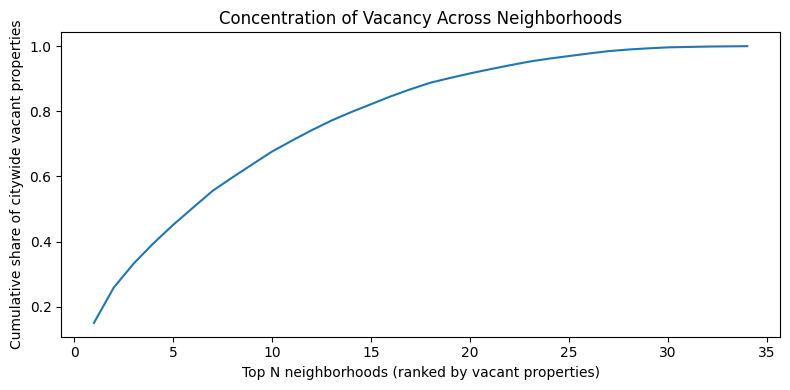

In [34]:
plt.figure(figsize=(8,4))
plt.plot(range(1, len(df2)+1), df2["cum_share"])
plt.xlabel("Top N neighborhoods (ranked by vacant properties)")
plt.ylabel("Cumulative share of citywide vacant properties")
plt.title("Concentration of Vacancy Across Neighborhoods")
plt.tight_layout()
plt.show()


In [35]:
# Tiers by citywide share thresholds (edit if you want)
def tier(share):
    if share >= 0.07:
        return "High"
    if share >= 0.03:
        return "Medium"
    return "Low"

df2["risk_tier"] = df2["vacancy_share_citywide"].apply(tier)

display(df2[["neighborhood","vacant_properties","vacancy_share_citywide","risk_tier"]].head(20))


,neighborhood,vacant_properties,vacancy_share_citywide,risk_tier
0,Brighton,248,0.150212,High
1,Northside,179,0.108419,High
2,Near Westside,121,0.073289,High
3,Southside,103,0.062386,Medium
4,Southwest,94,0.056935,Medium
5,Elmwood,87,0.052695,Medium
6,Eastwood,86,0.052090,Medium
7,Park Ave,68,0.041187,Medium
8,Washington Square,66,0.039976,Medium
9,Lincoln Hill,65,0.039370,Medium


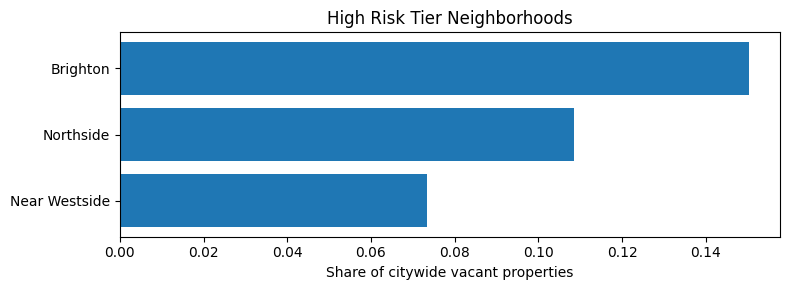

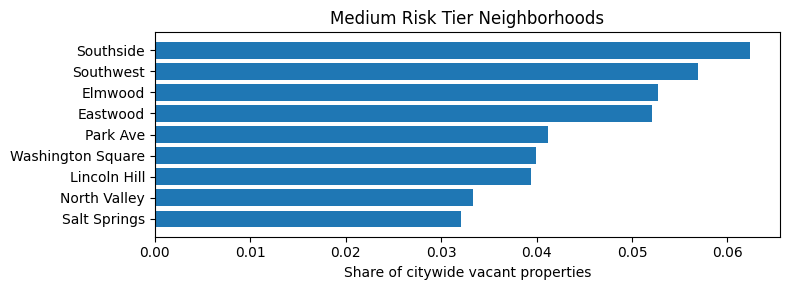

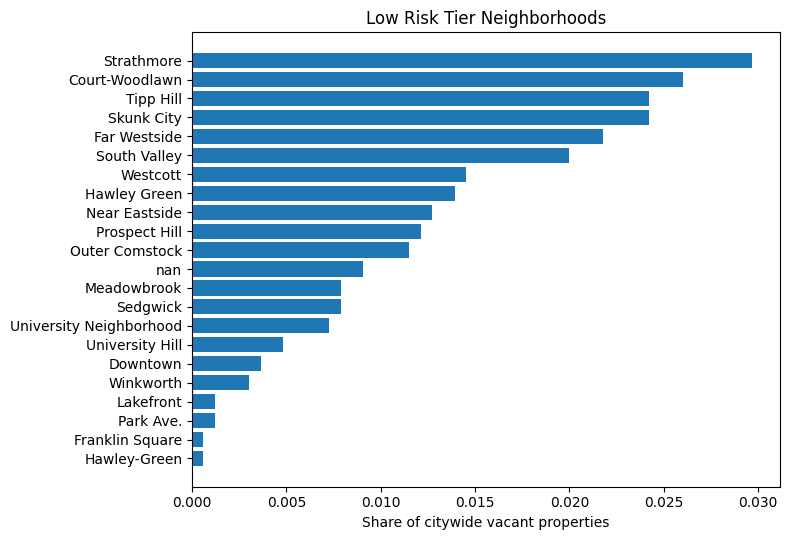

In [36]:
high = df2[df2["risk_tier"]=="High"].copy()
med  = df2[df2["risk_tier"]=="Medium"].copy()
low  = df2[df2["risk_tier"]=="Low"].copy()

for label, sub in [("High", high), ("Medium", med), ("Low", low)]:
    plt.figure(figsize=(8, max(3, len(sub)*0.25)))
    plt.barh(sub["neighborhood"].astype(str), sub["vacancy_share_citywide"])
    plt.xlabel("Share of citywide vacant properties")
    plt.title(f"{label} Risk Tier Neighborhoods")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


,neighborhood,vacant_properties,residential,commercial,res_share_in_nb,com_share_in_nb
0,Brighton,248,240,8,0.967742,0.032258
1,Northside,179,162,17,0.905028,0.094972
2,Near Westside,121,107,14,0.884298,0.115702
3,Southside,103,95,8,0.922330,0.077670
4,Southwest,94,89,5,0.946809,0.053191
5,Elmwood,87,75,12,0.862069,0.137931
6,Eastwood,86,77,9,0.895349,0.104651
7,Park Ave,68,56,12,0.823529,0.176471
8,Washington Square,66,58,8,0.878788,0.121212
9,Lincoln Hill,65,59,6,0.907692,0.092308


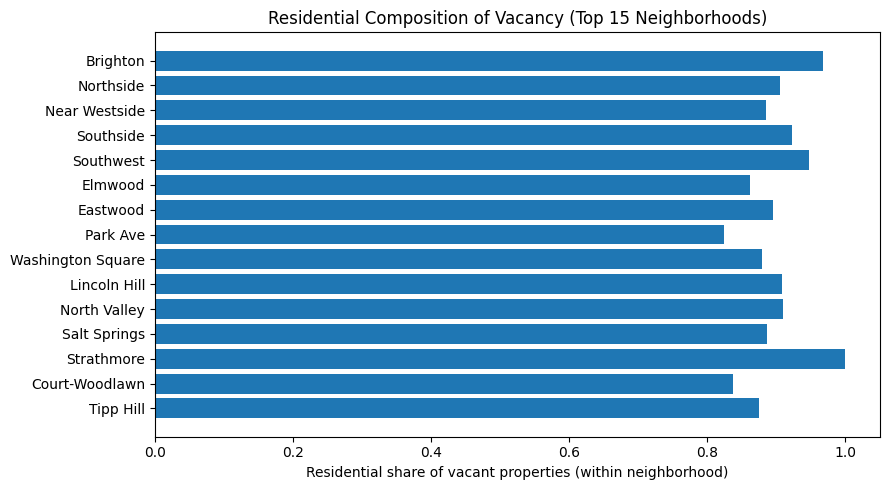

In [37]:
if {"residential","commercial"}.issubset(df2.columns):
    df2["res_share_in_nb"] = df2["residential"] / df2["vacant_properties"].replace(0, pd.NA)
    df2["com_share_in_nb"] = df2["commercial"] / df2["vacant_properties"].replace(0, pd.NA)

    display(df2[["neighborhood","vacant_properties","residential","commercial","res_share_in_nb","com_share_in_nb"]].head(15))

    top = df2.head(15)
    plt.figure(figsize=(9,5))
    plt.barh(top["neighborhood"].astype(str), top["res_share_in_nb"])
    plt.xlabel("Residential share of vacant properties (within neighborhood)")
    plt.title("Residential Composition of Vacancy (Top 15 Neighborhoods)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("Residential/Commercial columns not found in this saved summary.")


In [38]:
top5 = df2.head(5)[["neighborhood","vacant_properties","vacancy_share_citywide"]]
bottom5 = df2.tail(5)[["neighborhood","vacant_properties","vacancy_share_citywide"]]

print("Top 5 neighborhoods by vacant properties:")
for _, r in top5.iterrows():
    print(f"- {r['neighborhood']}: {int(r['vacant_properties'])} ({r['vacancy_share_citywide']:.1%} of city total)")

print("\nLowest 5 neighborhoods by vacant properties:")
for _, r in bottom5.iterrows():
    print(f"- {r['neighborhood']}: {int(r['vacant_properties'])} ({r['vacancy_share_citywide']:.1%})")

# “How many neighborhoods account for 50% and 80%?”
n50 = (df2["cum_share"] >= 0.50).idxmax() + 1
n80 = (df2["cum_share"] >= 0.80).idxmax() + 1
print(f"\nTop {n50} neighborhoods account for ~50% of vacant properties.")
print(f"Top {n80} neighborhoods account for ~80% of vacant properties.")


Top 5 neighborhoods by vacant properties:
- Brighton: 248 (15.0% of city total)
- Northside: 179 (10.8% of city total)
- Near Westside: 121 (7.3% of city total)
- Southside: 103 (6.2% of city total)
- Southwest: 94 (5.7% of city total)

Lowest 5 neighborhoods by vacant properties:
- Winkworth: 5 (0.3%)
- Lakefront: 2 (0.1%)
- Park Ave.: 2 (0.1%)
- Franklin Square: 1 (0.1%)
- Hawley-Green: 1 (0.1%)

Top 6 neighborhoods account for ~50% of vacant properties.
Top 15 neighborhoods account for ~80% of vacant properties.


Vacant shape: (1651, 17)
Snow shape: (3685, 71)


,X,Y,SBL,PropertyAddress,Zip,Owner,OwnerAddress,Vacant,neighborhood,VPR_result,completion_date,completion_type_name,valid_until,VPR_valid,Latitude,Longitude,ObjectId
0,NaN,NaN,002.-04-02.4,1920 Park St,13208,Wellington Ward LLC,"100 Windsor Pl Syracuse, NY 13210",Residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,-8.476690e+06,5.315382e+06,077.-23-25.0,316 Warner Ave,13205,Donna Larode,"321 Warner Ave Syracuse, NY 13205",Residential,Brighton,NaN,NaN,NaN,NaN,NaN,43.0224,-76.1474,2
2,-8.476078e+06,5.315534e+06,077.-10-15.0,2223 State St S & Amherst Ave,13205,Vladimir Dyomin,"2644 Torrey Pines Rd La Jolla, CA 92037",Residential,Brighton,VPR - Valid / Year 2,2022/12/08,VPR Cert Issued - Plan B,2023/12/08,N,43.0234,-76.1419,3
3,-8.479473e+06,5.319570e+06,109.-05-04.0,353 Richmond Ave,13204,Jason Yagan,"353 Richmond Ave Syracuse, NY 13204",Residential,Park Ave,NaN,NaN,NaN,NaN,NaN,43.0499,-76.1724,4
4,-8.475432e+06,5.320042e+06,030.-03-01.0,500 Hawley Ave & Crouse Ave N,13203,City of Syracuse,"233 E Washington St Syracuse, NY 13202",Commercial,Hawley Green,NaN,NaN,NaN,NaN,NaN,43.0530,-76.1361,5


,OBJECTID,DateModifi,NYSStreetI,LeftFromAd,LeftToAddr,RightFromA,RightToAdd,CompleteSt,PreModifie,PreDirecti,...,USERNAME,LeftCountr,RightCou_1,LeftParity,RightParit,LeftESN,RightESN,Shape_Leng,Shape_STLe,Shape__Length
0,1,2009/01/02 00:00:00+00,477437369,201,225,200,224,East Adams Street,,E,...,,,,,,,,58.738397,0.0,58.738397
1,2,2009/01/02 00:00:00+00,477437378,227,299,226,298,East Adams Street,,E,...,,,,,,,,104.683547,0.0,104.683547
2,3,2009/01/02 00:00:00+00,477437366,1,199,2,198,East Adams Street,,E,...,,,,,,,,54.346069,0.0,54.346069
3,4,2009/01/02 00:00:00+00,477437384,551,599,526,598,East Adams Street,,E,...,,,,,,,,70.800560,0.0,70.800560
4,5,2009/01/02 00:00:00+00,477437396,601,625,600,624,East Adams Street,,E,...,,,,,,,,71.957257,0.0,71.957257



Vacant column meaning (type):


,count
Vacant,
Residential,1489
Commercial,162


,neighborhood,vacant_properties,residential,commercial,vacancy_share_citywide,vacancy_rank
0,Brighton,248,240,8,0.150212,1
15,Northside,179,162,17,0.108419,2
13,Near Westside,121,107,14,0.073289,3
24,Southside,103,95,8,0.062386,4
25,Southwest,94,89,5,0.056935,5
4,Elmwood,87,75,12,0.052695,6
3,Eastwood,86,77,9,0.052090,7
17,Park Ave,68,56,12,0.041187,8
30,Washington Square,66,58,8,0.039976,9
10,Lincoln Hill,65,59,6,0.039370,10


Saved: /content/neighborhood_vacancy_summary.csv
Saved: /content/neighborhood_vacancy_winter_risk_summary.csv


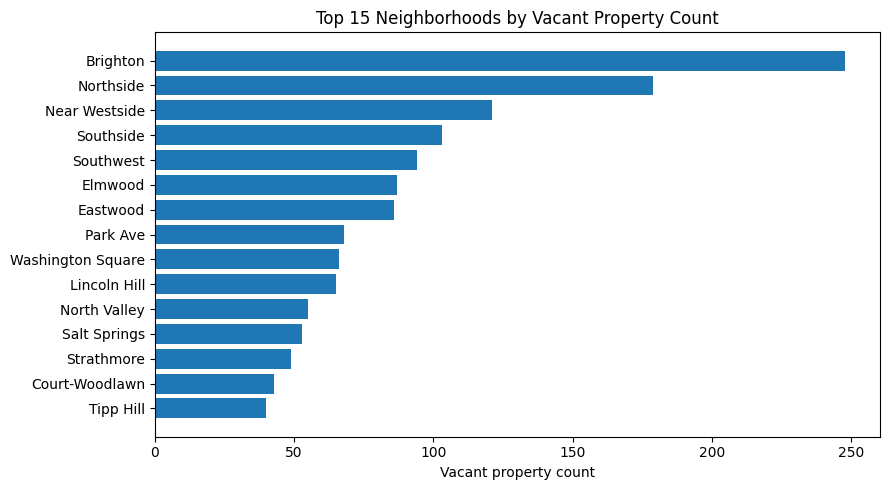

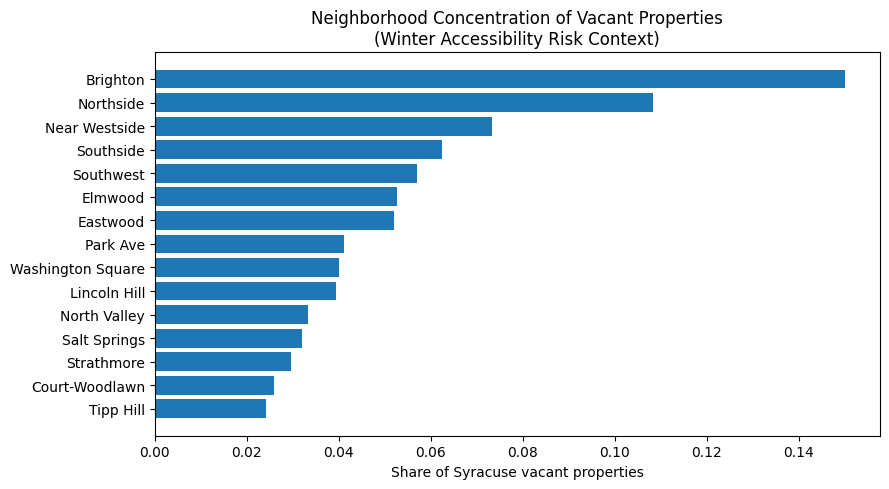

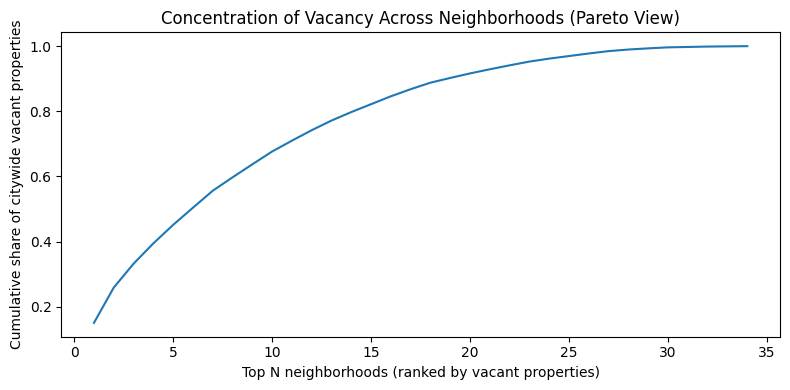


=== ML Classification Report (High Vacancy Risk) ===
              precision    recall  f1-score   support

           0      0.889     1.000     0.941         8
           1      1.000     0.667     0.800         3

    accuracy                          0.909        11
   macro avg      0.944     0.833     0.871        11
weighted avg      0.919     0.909     0.903        11

Confusion Matrix:
 [[8 0]
 [1 2]]

=== Logistic Regression Coefficients (interpretability) ===


,feature,coefficient
2,commercial,1.359745
0,vacant_properties,0.796132
1,residential,0.726091


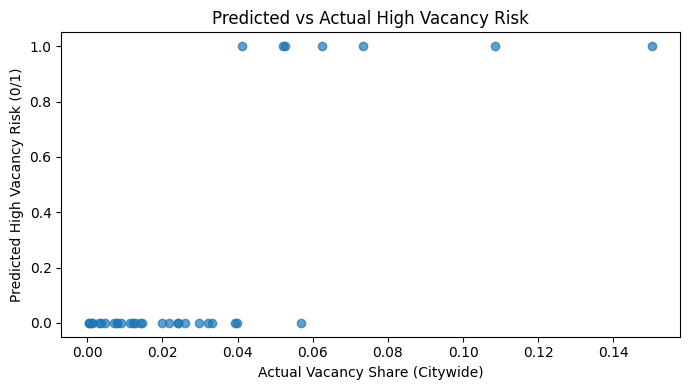

Saved: /content/neighborhood_vacancy_ml_predictions.csv

--- Methodology Note (Copy/Paste) ---
Initial attempts to link vacant properties to emergency snow routes at the parcel or street level produced no valid matches, reflecting a structural mismatch between address-based property data and GIS-based corridor representations of snow routes. To avoid misleading conclusions, the analysis pivots to a neighborhood-level framework, examining how concentrations of vacant properties correspond to winter accessibility risk in a broader geographic context. A lightweight, explainable ML model (logistic regression) is included as an exploratory classifier to flag neighborhoods with high vacancy concentration (top quartile), not to predict future vacancy or causality.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1) Load data
# -----------------------------
vacant_path = "/content/Vacant_Properties.csv"
snow_path   = "/content/Emergency_Snow_Routes.csv"

vacant = pd.read_csv(vacant_path)
snow   = pd.read_csv(snow_path)

print("Vacant shape:", vacant.shape)
print("Snow shape:", snow.shape)
display(vacant.head())
display(snow.head())


for col in ["completion_date", "valid_until"]:
    if col in vacant.columns:
        vacant[col] = pd.to_datetime(vacant[col], errors="coerce")

if "DateModifi" in snow.columns:
    snow["DateModifi"] = pd.to_datetime(snow["DateModifi"], errors="coerce")

# Confirm this dataset is already "vacant properties"
print("\nVacant column meaning (type):")
display(vacant["Vacant"].value_counts(dropna=False))

vacant_only = vacant.copy()

required_cols = ["neighborhood", "PropertyAddress", "Vacant"]
missing = [c for c in required_cols if c not in vacant_only.columns]
assert not missing, f"Missing required columns in Vacant_Properties.csv: {missing}"

neighborhood_summary = (
    vacant_only
    .groupby("neighborhood", dropna=False)
    .agg(
        vacant_properties=("PropertyAddress", "count"),
        residential=("Vacant", lambda s: (s == "Residential").sum()),
        commercial=("Vacant", lambda s: (s == "Commercial").sum()),
    )
    .reset_index()
    .sort_values("vacant_properties", ascending=False)
)


total_vacant = neighborhood_summary["vacant_properties"].sum()
neighborhood_summary["vacancy_share_citywide"] = neighborhood_summary["vacant_properties"] / total_vacant
neighborhood_summary["vacancy_rank"] = neighborhood_summary["vacant_properties"].rank(ascending=False, method="dense").astype(int)

assert neighborhood_summary["vacant_properties"].gt(0).all()
assert neighborhood_summary["vacancy_share_citywide"].between(0, 1).all()
assert round(neighborhood_summary["vacancy_share_citywide"].sum(), 6) == 1.0

display(neighborhood_summary.head(15))


neighborhood_summary.to_csv("/content/neighborhood_vacancy_summary.csv", index=False)
print("Saved: /content/neighborhood_vacancy_summary.csv")



final_summary = neighborhood_summary.copy()
final_summary.to_csv("/content/neighborhood_vacancy_winter_risk_summary.csv", index=False)
print("Saved: /content/neighborhood_vacancy_winter_risk_summary.csv")


top15 = final_summary.head(15)

plt.figure(figsize=(9,5))
plt.barh(top15["neighborhood"].astype(str), top15["vacant_properties"])
plt.xlabel("Vacant property count")
plt.title("Top 15 Neighborhoods by Vacant Property Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Viz B: Share of citywide vacant properties (top 15)
plt.figure(figsize=(9,5))
plt.barh(top15["neighborhood"].astype(str), top15["vacancy_share_citywide"])
plt.xlabel("Share of Syracuse vacant properties")
plt.title("Neighborhood Concentration of Vacant Properties\n(Winter Accessibility Risk Context)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Viz C: Pareto curve (cumulative share)
pareto = final_summary.sort_values("vacant_properties", ascending=False).copy()
pareto["cum_share"] = pareto["vacancy_share_citywide"].cumsum()

plt.figure(figsize=(8,4))
plt.plot(range(1, len(pareto)+1), pareto["cum_share"])
plt.xlabel("Top N neighborhoods (ranked by vacant properties)")
plt.ylabel("Cumulative share of citywide vacant properties")
plt.title("Concentration of Vacancy Across Neighborhoods (Pareto View)")
plt.tight_layout()
plt.show()


df_ml = final_summary.copy()

# Create target label (top quartile = high risk)
threshold = df_ml["vacancy_share_citywide"].quantile(0.75)
df_ml["high_vacancy_risk"] = (df_ml["vacancy_share_citywide"] >= threshold).astype(int)

# Features (simple, interpretable)
feature_cols = ["vacant_properties", "residential", "commercial"]
X = df_ml[feature_cols]
y = df_ml["high_vacancy_risk"]

# Train/test split (note: small dataset -> results are illustrative)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("\n=== ML Classification Report (High Vacancy Risk) ===")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": pipe.named_steps["model"].coef_[0]
}).sort_values("coefficient", ascending=False)

print("\n=== Logistic Regression Coefficients (interpretability) ===")
display(coef_df)


df_ml["predicted_high_risk"] = pipe.predict(X)


plt.figure(figsize=(7,4))
plt.scatter(df_ml["vacancy_share_citywide"], df_ml["predicted_high_risk"], alpha=0.7)
plt.xlabel("Actual Vacancy Share (Citywide)")
plt.ylabel("Predicted High Vacancy Risk (0/1)")
plt.title("Predicted vs Actual High Vacancy Risk")
plt.tight_layout()
plt.show()


df_ml[[
    "neighborhood",
    "vacant_properties",
    "residential",
    "commercial",
    "vacancy_share_citywide",
    "high_vacancy_risk",
    "predicted_high_risk"
]].to_csv("/content/neighborhood_vacancy_ml_predictions.csv", index=False)

print("Saved: /content/neighborhood_vacancy_ml_predictions.csv")


print("\n--- Methodology Note (Copy/Paste) ---")
print(
    "Initial attempts to link vacant properties to emergency snow routes at the parcel or street level produced no valid matches, "
    "reflecting a structural mismatch between address-based property data and GIS-based corridor representations of snow routes. "
    "To avoid misleading conclusions, the analysis pivots to a neighborhood-level framework, examining how concentrations of vacant "
    "properties correspond to winter accessibility risk in a broader geographic context. "
    "A lightweight, explainable ML model (logistic regression) is included as an exploratory classifier to flag neighborhoods with "
    "high vacancy concentration (top quartile), not to predict future vacancy or causality."
)
